# Projeto - Previsão de Vendas - Engenharia/Ciência de Dados

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

### Passo a Passo de um Projeto de Engenharia/Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto - Previsão de Vendas - Engenharia/Ciência de Dados

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

### Importar a Base de dados

In [24]:
#importar lib de graficos
!pip install matplotlib
!pip install seaborn

#importar lib Inteligência Artificial
!pip install scikit-learn


In [25]:
#importar o pandas
import pandas as pd

#importar base (arquivo) com dos dados de ivestimento e vendas
tabela = pd.read_csv(r"Arquivos\advertising.csv") # o "r" é para o Python não interpretar o "\" como outro caracter reservado, usar como barra mesmo.

display(tabela)

display(tabela.info())

#Analise para ficar LIGADO!!!:
#Vamos observar que o Valor em Vendas (possivel Milhoes) esta me uma escala diferente da de Tv, Radio e Jornal (possivel em mil).
#Caso não forem, então ja veriamos que o total de vendas sempre é menor que o gasto de publicidade, assim ja é prejuizo.


,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


None

#### Esta base ja esta noramlizada, mas sempre é bom fazer os tratamentos necessarios para "limpar" as base antes de trabalhar/analisar

### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

In [26]:
# descobrir a correlação dentro da tabela

In [27]:
# Por meio de gráficos
# matplotlib , seborn e ploty (mas esta ultima nao usaremos)

import seaborn as sns

import matplotlib.pyplot as plt


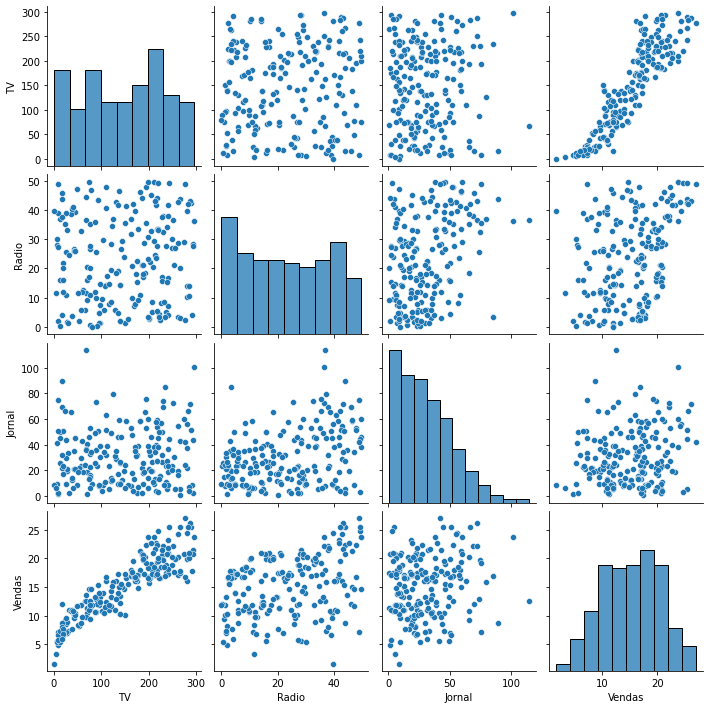

In [28]:
# criar grafico
sns.pairplot(tabela) # mostrar correlação das informações dentro da tabela. Combinação de pares, compara coluna com outra coluna.

# exibir o grafico logo acima dele, no nosso caso o sns.pairplot(tabela)
plt.show()

# graficos de barra: é a coluna com a mesma (tv com tv, radio com radio, jornal com jornal e vendas com vendas): 
#                    bom para ver se os valores estão parecidos, sem valores muito discrepantes.

# grafico de fusao (pontos): Guanto mais juntos mais direot é, e quanto mais aumenta um os pontos aumentarem tambem, 
                             # fala que crescem juntos.

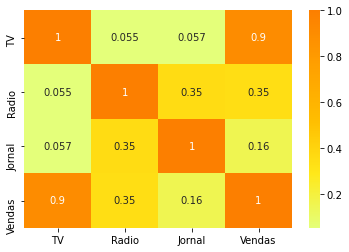

In [29]:
# criar grafico de calor. Neste temos que passar o que queremos analisar/exibir.
# neste caso o .corr() é para correlações. O cmap = Wistia para trocar as cores. O annot = True é para exibir os numeros.
sns.heatmap(tabela.corr(), cmap="Wistia", annot=True) 

# exibir o grafico logo acima dele, no nosso caso o sns.heatmap(tabela)
plt.show()

# Este mapa de calor: quanto mais proximo de 1 mais forte é a correlação (correlação é que são proporcionais, um cresce, o outro também). 
                #     se for para -1 seria inversamente proporcional.
                #     Quanto mais proximo de 0 (zero) menos é a correlação.
        # Se caso os valores correlacionados que estamos estudando (TV, Radio ou Jornal) ficassem quase igual ou igual a 
        # 1 (um) ou -1 (menos um) tiramos da analise pois prejudicara a IA que vamos usar, pois falam a mesma coisa.

#### Se aumentar os investimentos aumentamos ou nao as vendas?
   #### Então olhamos a linha de vendas para analisar.

#### Correlação mais perto de zero menor correlação, ou seja, um impacta menos no outro. Caso mais perto de 1, o impacto é muito forte.

#### Desde modo, olhando a ultima linha temos: Vemos que  se Investir mais em Tv as vendas é maior que em Jornal, ja em radio é um menor que TV mas melhor que jornais ainda.

### Coma a base ja tratada devidamente podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [30]:
#separar os dados em x e y

# vou usar para calcular as vendas
# podemos fazer assim nos casos de poucas colunas na tabela x = tabela[["TV", "Radio", "Jornal"]] 

# usamos o .drop("nomeColuna") para tirar uma coluna de um result, para saber que é coluna usamos axis=1, se axis=0 seria linha.
x = tabela.drop("Vendas", axis=1) # assim pegamos todos colunas menos a que queremos prever, bom para tabela com varias colunas.

# o que quero prever, o que quero cálcular
y = tabela["Vendas"] 


#### Para evitar o Overfitting (IA so funciona com a base que treinou e erra com novos dados), passamos apenas 70% ou 80%  da base para treinar, e testamos com os 30% ou 20% restante, que são no caso, dados novos fora do treino, para vermos se esta ok as previsoes.

In [31]:
#Importar da Sklearn apenas a train_test_split para dividir nossa base de dados para trabalhar com IA
from sklearn.model_selection import train_test_split

#separar os dados em treino e teste. Pegar "x" e "y" e dividir automaticamente entre treino e teste, a lib train_test_split

#Test_size=0.3 é para termos 30% da base para teste e 70% para treino (sempre treino maior recomendado).
#sempre colocar as variaveis nesta ordem, é nesta ordem que train_test_split "solta" seu resultado.
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3) #, random_state=1) este é para usar a mesma parte da base no teste sempre.


### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

#### Vamos usar modelos de Regrassao por procurar um Valor, se fosse sentimento, ou classes seria Classificação
- Regressão Linear
- RandomForest (Árvore de Decisão)

In [32]:
#importar Regressao Linear e o RamdomForest para vermos qual destes algorimos será melhor para nossa previsão com IA
#regressao: Olhar a base e trassar uma reta, melhor regressao
from sklearn.linear_model import LinearRegression

#Arvore de deicao: separa os dados em grupos com decisões, nas respostas vai alocando os dados em "braços/pernas" como em uma arvore.
from sklearn.ensemble import RandomForestRegressor


In [33]:
# Criar as inteligencias Artificial

modelo_RegressaoLinear = LinearRegression() # Regressão Linear

modelo_ArvoreDecisao = RandomForestRegressor() #RandomForest (Árvore de Decisão)


In [34]:
# treinar as inteligencias artificial

modelo_RegressaoLinear.fit(x_treino, y_treino)

modelo_ArvoreDecisao.fit(x_treino, y_treino)


RandomForestRegressor()

### Teste da AI e Avaliação do Melhor Modelo se Regressao ou ArvoreDecisao

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece. Quanto mais proximo de 100% melhor
- Vamos usar também o MSE (Erro Quadrático Médio) -> Diz o qunato o nosso modelo "erra" quando tenta fazer uma previsão. Quanto maior o valor fala que é muitos erros, assim, quanto menor o valor melhor.


In [35]:
# importar lib Metrics que contem os modelos de teste
from sklearn import metrics

# R quadrado: maior percentual melhor
from sklearn.metrics import r2_score


#criar as previsoes para podermos testar
previsao_RegressaoLinear = modelo_RegressaoLinear.predict(x_teste) #predict para fazer a previsao

previsao_ArvoreDecisao = modelo_ArvoreDecisao.predict(x_teste)


In [36]:
#Comparar as previsoes com o Gabarito. Vamos calcular, realizando a previsao e comparar com resultado, 
#e ver com r quadrado se ta proximo ou longe do que esta na base de teste 

# R2
# podemos usar assim tambem
# print(r2_score(y_teste, previsao_RegressaoLinear)) 
# print(r2_score(y_teste, previsao_ArvoreDecisao)) 

r2_linear = metrics.r2_score(y_teste, previsao_RegressaoLinear) #gabarito "y_teste" comparando com o que veio na previsao
r2_random = metrics.r2_score(y_teste, previsao_ArvoreDecisao) #gabarito "y_teste" comparando com o que veio na previsao

# MSE
erro_linear = metrics.mean_squared_error(y_teste, previsao_RegressaoLinear)
erro_random = metrics.mean_squared_error(y_teste, previsao_ArvoreDecisao)

# Vamos "printar" para ver os resultados
print(r2_linear, r2_random)
print(erro_linear, erro_random)

# Vemos que a previsão ficou muito boas (nossa margem é acima de 80%, se fosse em hospital que é acima 98% ja não seria,
# teriamos que procurar novo modelos para melhorar modelos, ou aumentar a base de dados)



0.9024934169970573 0.9357088804373378
2.577407488762332 1.6994177


In [37]:
#vamos colocar em percentual
print(f"{r2_score(y_teste, previsao_RegressaoLinear):.1%}")

print(f"{r2_score(y_teste, previsao_ArvoreDecisao):.1%}")


90.2%
93.6%


In [38]:
# podemos usar assim tambem
print(f"{r2_linear:.1%}", f"{r2_random:.1%}")
print(f"{erro_linear:.1%}", f"{erro_random:.1%}")

90.2% 93.6%
257.7% 169.9%


####  Vemos que na previsao de MSE a Random Forest ficou menor, menos erros que na Regressao Linear. Vemos ainda que no R2 a Random Forest ficou mais proximo de 1 que a Regressao Linear. 
#### Pela nossa análise Random Forest é melhor, e esta que iremos adotar

In [39]:
# O melhor modelo é a Arvore de Decisao (Random Forest)

In [40]:
# vamos fazer nosvas previsoes com o modelo
novos_Valores = pd.read_csv("Arquivos/novos.csv")

display(novos_Valores)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [41]:
# criar nova previsao
nova_previsao = modelo_ArvoreDecisao.predict(novos_Valores)

display(nova_previsao) # resultado esta na ordem do "index", sendo 0, 1, 2


array([ 7.423,  9.008, 20.107])

### Visualização Gráfica das Previsões

In [42]:
#vamos criar um data Frame para tabela comparação
tabela_comparacao = pd.DataFrame()
tabela_comparacao["Vendas Reais"] = y_teste # criamos uma coluna com os valores de vendas reais.
tabela_comparacao["Previsao Random"] = previsao_ArvoreDecisao # criamos uma coluna com os valores das previsões de vendas.

display(tabela_comparacao)

,Vendas Reais,Previsao Random
153,16.0,20.335
38,10.1,10.187
121,7.0,7.033
98,25.4,24.911
174,16.5,16.998
179,17.6,17.132
137,20.8,19.859
46,10.6,11.502
188,20.9,19.948
87,16.0,15.330


In [43]:
# vamos corrigir os index da tabela
#reset_index reseta o indice, e o drop=true joga fora o indice antigo
tabela_comparacao = tabela_comparacao.reset_index(drop=True)

display(tabela_comparacao)

,Vendas Reais,Previsao Random
0,16.0,20.335
1,10.1,10.187
2,7.0,7.033
3,25.4,24.911
4,16.5,16.998
5,17.6,17.132
6,20.8,19.859
7,10.6,11.502
8,20.9,19.948
9,16.0,15.330


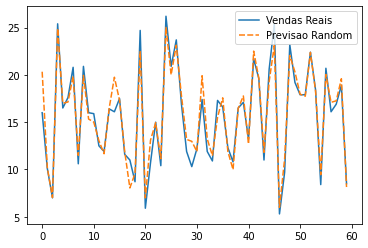

In [44]:
# Vamos analisar as previsões em um grafico, vamos aqui utilizar um grafico de linhas
sns.lineplot(data=tabela_comparacao)
plt.show()


### Modelo acompanhou comprovadamente as vendas reais com suas previsões

### para realizar as previsões agora so utlizar : randomforest.predict(ValorTV, ValorRadio, ValorJornal)

### Qual a importância de cada variável para as vendas?

In [45]:
# quanto mais perto de 1 (um) mais importante ele é. Aqui segue a ordem TV, Radio e Jornal
print(modelo_ArvoreDecisao.feature_importances_)
print("TV", "Radio", "Jornal")

[0.86430533 0.11775279 0.01794188]
TV Radio Jornal


In [46]:
# vamos ver o quanto gastamos neles. 
print(tabela[["TV", "Radio", "Jornal"]].sum())

TV        29408.5
Radio      4652.8
Jornal     6110.8
dtype: float64


### Será que estamos investindo certo?

### Vemos com a análise de importancia das variáveis que a empresa gasta mais em Jornal que em Radio, porém  Radio é mais importante que Jornal nas vendas, Radio tem mais impacto nas vendas.